# Jupyter Notebook

- Enter cell: *enter*
- Leave cell: *esc*
- Create new cell below: *b*
- Create new cell above: *a*
- Delete cell: *d d*
- Convert cell to markdown: *m*
- Run cell: *command+enter*
- Run cell and go to next: *shift + enter*
- Auto complete: *tab*
- Signature autocomplete: *shift + tab*

# Intro to Python

In [1]:
# print
print("Hello World")
print("Hello" + " World")

# print text + variable
x = "World"
print("Hello %s"%x)

# boolean
print(1==1)
print(1>2)

Hello World
Hello World
Hello World
True
False


In [2]:
# lists
l = [1,2,3,4,5]

# add new elemenent to list
l.append(6)

# remove
l.remove(2)

# lenght
len(l)

# get element
l[0]

# count elements
l.count(1)

print(l)

[1, 3, 4, 5, 6]


In [3]:
# dictionaries
studentnumbers = {"Aachen": 44500, "Bochum": 42700, "Bonn": 38000, "Duisburg-Essen": 38900, "Koeln": 49800}

# get element of dict
print(studentnumbers["Aachen"])

44500


In [4]:
# if else
if studentnumbers["Aachen"]>studentnumbers["Bonn"]:
    print("There are more students in Aachen than Bonn.")
else:
    print("There are more students in Bonn than Aachen.")

There are more students in Aachen than Bonn.


In [5]:
# for loop
student_sum = 0
for city in studentnumbers:
    print(city, studentnumbers[city])
    student_sum += studentnumbers[city]
    
print("Sum:",student_sum)

Aachen 44500
Bochum 42700
Bonn 38000
Duisburg-Essen 38900
Koeln 49800
Sum: 213900


In [6]:
# while loop (if we do not know how often the loop should run, but use with caution)
counter = 1
while counter<5:
    print(counter)
    counter = counter+1

1
2
3
4


In [7]:
# define function
def square_number(x):
    return x*x

print(square_number(4))

16


In [8]:
# import libraries
from math import *
pi

3.141592653589793

# Intro to Numpy

In [ ]:
# import
import numpy as np

In [ ]:
# create numpy array
a = np.array([1, 2, 3])

# how to get elements from arrays:
# first element has index 0
# a[0] = 1
# a[1] = 2
# a[2] = 3

# get first 3 elements of array a 
print(a[0:3])

# assign new values
a[0] = 5
print(a)

b = np.array([1, 2, 3])

# operations
print(a + b)
print(np.sqrt(a))
print(np.mean(a))
print(np.std(a))
# ...




[1 2 3]
[5 2 3]
[6 4 6]
[2.23606798 1.41421356 1.73205081]
3.3333333333333335
1.247219128924647


# Intro to Pandas
Pandas is based on numpy. A row/column of a pandas dataframe is treated just like a numpy array.

In [20]:
import pandas as pd

In [21]:
# create dataframe with 3 columns and 4 rows from dictionary
df = pd.DataFrame({'A': [-2, 1, 7, 22],
                   'B': [-42, 75, 5, -4],
                   'C': [11, -17, -44, -89]})
df

,A,B,C
0,-2,-42,11
1,1,75,-17
2,7,5,-44
3,22,-4,-89


In [22]:
# Change row name (also called index)
df.index = ['One', 'Two', 'Three', 'Four']
df

,A,B,C
One,-2,-42,11
Two,1,75,-17
Three,7,5,-44
Four,22,-4,-89


In [23]:
# Add columns
df['D'] = [-1, 1, -2, 2]
df

,A,B,C,D
One,-2,-42,11,-1
Two,1,75,-17,1
Three,7,5,-44,-2
Four,22,-4,-89,2


In [24]:
# Delete column
df = df.drop(['D'], axis='columns')
df

,A,B,C
One,-2,-42,11
Two,1,75,-17
Three,7,5,-44
Four,22,-4,-89


In [25]:
# Choose columns
first_column = df[['A']]
first_column

,A
One,-2
Two,1
Three,7
Four,22


In [26]:
# Choose element by index and column name
print("The element Two,B is:", df.loc["Two","B"])

# reset index
df.reset_index(inplace=True,drop=True)
print(df)

# choose an element by the order (starting with 0!)
element_22 = df.iloc[2, 2]
print("The element 2,2 ist: ",element_22)

# choose row
row_Eins = df.loc[1, :].copy()
print("Row One as series:")
print(row_Eins)

The element Two,B is: 75
    A   B   C
0  -2 -42  11
1   1  75 -17
2   7   5 -44
3  22  -4 -89
The element 2,2 ist:  -44
Row One as series:
A     1
B    75
C   -17
Name: 1, dtype: int64


In [27]:
# slice and dice
df2 = df[df.A > 0]
df2

,A,B,C
1,1,75,-17
2,7,5,-44
3,22,-4,-89


# Intro to Matplotlib

In [28]:
import matplotlib.pyplot as plt

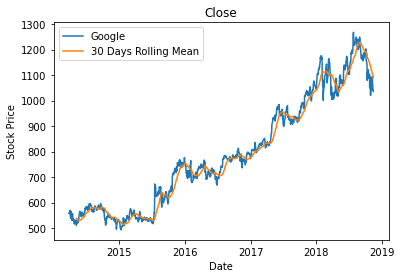

In [31]:
# read data with pandas
df = pd.read_csv("goog.csv", index_col='date')

# convert dates to datetime series (so it becomes time aware)
df.index = pd.to_datetime(df.index)

# rolling mean
df["rolling_mean"] = df["close"].rolling(30).mean()

# plot
plt.plot(df["close"],label="Google")
plt.plot(df["rolling_mean"],label="30 Days Rolling Mean")

# label the plot
plt.title('Close')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# show plot
plt.show()

# Intro to Statistics Libraries
There are many different libraries that we will use for statistics. Let's start with a simple linear regression. We can use a variety of libraries for that (statsmodels, skleanr, scipy, pingouin,...) with different advantages and disadvantage. We will use statsmodels for now.

In [32]:
# read advertising data set advertising.csv
advert = pd.read_csv('advertising.csv')

In [33]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using statsmodels
model = smf.ols('Sales ~ TV', data=advert)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           1.47e-42
Time:                        11:47:41   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

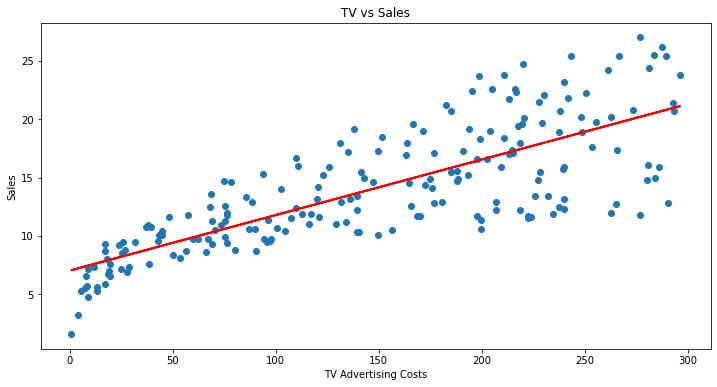

In [35]:
# Predict values
sales_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(advert['TV'], advert['Sales'], 'o')           # scatter plot showing actual data
plt.plot(advert['TV'], sales_pred, 'r', linewidth=2)   # regression line
plt.xlabel('TV Advertising Costs')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.show()

In [36]:
# predict new value (for advertising = 400)
new_X = 400
model.predict({"TV": new_X})

0    26.04725
dtype: float64

## Exercise
- Import the file *Students.csv*.
- Run a linear regression that explains the average of the students based on the study time.
- Plot the prediction against the actual values.
- Now add more variables to the regression to increase the explanatory power of the model: age and gender. Check the coefficients for significance.
- Calculate the *Mean Absolute Percentage Error* and the *Root Mean Square Error*.

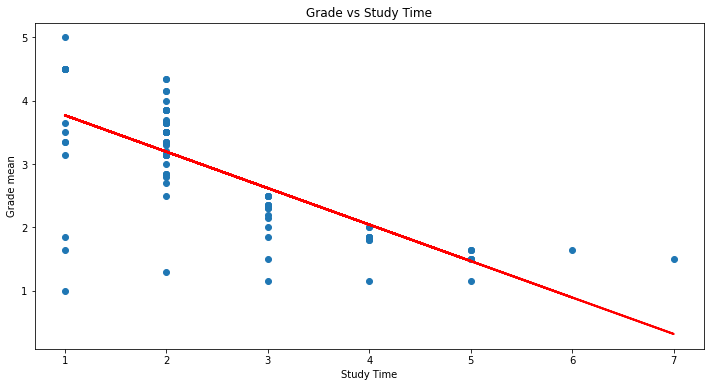

                            OLS Regression Results                            
Dep. Variable:                   Mean   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     36.89
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           6.77e-16
Time:                        11:56:59   Log-Likelihood:                -101.36
No. Observations:                  99   AIC:                             210.7
Df Residuals:                      95   BIC:                             221.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8138      0.562      6.

In [40]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Read data file


# Calculate average grade


# Initialise and fit linear regression model using `statsmodels`


# Predict values


# Plot regression against actual data


# more variables with categories


# Residuals


# MAPE and RMSE